## マッチングアプリシミュレータ
- 秘書問題をシミュレート
- 妥協案
- ストック案

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set_style("dark", {'grid.linestyle': '--'})

In [2]:
def simulator(k, N, trial,compromise=0):
    """
    k : 何番目までを見極め期間にするか
    N : 対象人数
    trial : 試行回数
    compromise : 1番じゃなくてもある程度なら許すか
    """
    success_count = 0
    for _ in range(trial):
        ### 初期化
        persons = [i+1 for i in range(N)]
        # 順番をランダムにしておく
        random.shuffle(persons)
        persons = np.array(persons)
        p_experience = persons[:k]
        p_choosing = persons[k:]
        t_min = p_experience.argmax()
        rank_min = p_experience.min()
        for i,rank in enumerate(p_choosing):
            if rank < rank_min:
                if rank <= max(1,N*compromise):
                    success_count += 1
                    break
                else:
                    break
    return success_count/trial

## 通常戦略の試行
- 横軸 : 何人目まで見極め期間か
- タテ軸 : 成功確率(一番いい人を捕まえられる確率)

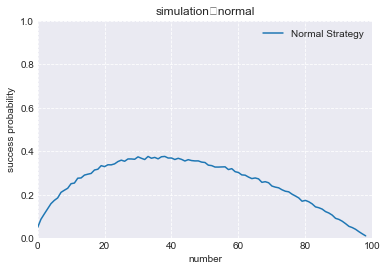

In [3]:
trial = 10000 #試行回数
N = 100 #対象人数
P = []
P_10 = [] #10%妥協
P_20 = [] #20%妥協
for k in range(1,100):
    P.append(simulator(k, N, trial))
 
plt.plot(P,label="Normal Strategy")
plt.legend()
plt.grid()
plt.xlim(0,100)
plt.ylim(0,1)
plt.xlabel("number")
plt.ylabel("success probability")
plt.title("simulation　normal")
plt.savefig("figures/6-1_sim.pdf")

## 妥協案の試行

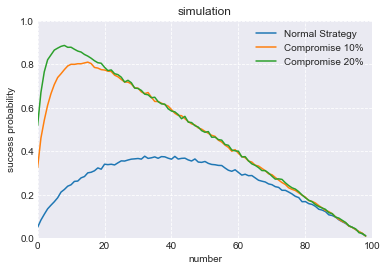

In [4]:
trial = 10000 #試行回数
N = 100 #対象人数
P = []
P_10 = [] #10%妥協
P_20 = [] #20%妥協
for k in range(1,100):
    P.append(simulator(k, N, trial))
    P_10.append(simulator(k,N,trial,compromise=0.10))
    P_20.append(simulator(k,N,trial,compromise=0.20))    
plt.plot(P,label="Normal Strategy")
plt.plot(P_10, label="Compromise 10%")
plt.plot(P_20, label="Compromise 20%")
plt.legend()
plt.grid()
plt.xlim(0,100)
plt.ylim(0,1)
plt.xlabel("number")
plt.ylabel("success probability")
plt.title("simulation")
plt.savefig("figures/6-2_simcompromise.pdf")

## 保留案
何人か会った後に、付き合うかどうかを決定する

In [5]:
def simulator_stock(k, N, trial,stock=10,compromise=0):
    """
    trial = 10000 #試行回数
    N = 100 #対象人数
    k = 3 # 何番目まで見極め期間にするか
    stock = 10 #何人単位で決めるか
    """
    success_count = 0
    n = (N-k)//stock
    amari = (N-k)%stock  
    for _ in range(trial):
        ### 初期化
        persons = [i+1 for i in range(N)]
        # 順番をランダムにしておく
        random.shuffle(persons)
        persons = np.array(persons)
        p_experience = persons[:k]
        p_choosing = persons[k:]
        t_min = p_experience.argmax()
        rank_min = p_experience.min()
        for i in range(1,n+1):
            #ストック幅の決定
            if i == n:
                if amari > 0:
                    start = k+stock*i
                    goal = k+stock*i+amari
                    p_stock = persons[start:goal]
                if amari == 0:
                    continue
            else:
                start = k+stock*(i-1)
                goal = k+stock*i
                p_stock = persons[start:goal]
            rank = p_stock.min()
            if rank < rank_min:
                if rank <= max(1,N*compromise):
                    success_count += 1
                    break
                else:
                    break
    return success_count/trial


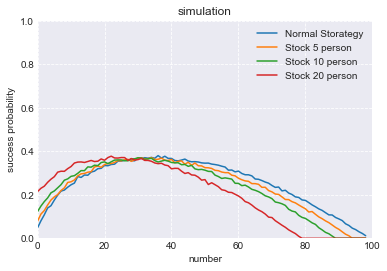

In [6]:
trial = 10000 #試行回数
N = 100 #対象人数
P = []
P_5c = []
P_10c = []
P_20c = []
for k in range(1,100):
    P.append(simulator(k, N, trial))
    P_5c.append(simulator_stock(k, N, trial,stock=5))
    P_10c.append(simulator_stock(k, N, trial,stock=10))
    P_20c.append(simulator_stock(k, N, trial,stock=20))
plt.plot(P,label="Normal Storategy")
plt.plot(P_5c,label="Stock 5 person")
plt.plot(P_10c,label="Stock 10 person")
plt.plot(P_20c,label="Stock 20 person")
plt.legend()
plt.grid()
plt.xlim(0,100)
plt.ylim(0,1)
plt.xlabel("number")
plt.ylabel("success probability")
plt.title("simulation")
plt.savefig("figures/6-3_simstock.pdf")

## 合わせ技
妥協と保留案をあわせる

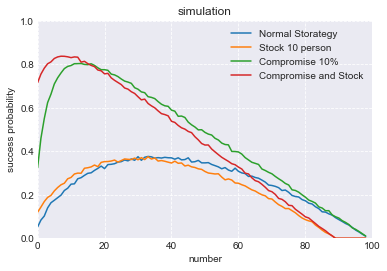

In [7]:
trial = 10000 #試行回数
N = 100 #対象人数
P = []
P_10s = [] 
P_10sc = []
P_10c = []
for k in range(1,100):
    P.append(simulator(k, N, trial))
    P_10s.append(simulator_stock(k, N, trial,stock=10))
    P_10sc.append(simulator_stock(k, N, trial,stock=10,compromise=0.1))
    P_10c.append(simulator(k, N, trial,compromise=0.1))
plt.plot(P,label="Normal Storategy")
plt.plot(P_10s,label="Stock 10 person")
plt.plot(P_10c,label="Compromise 10%")
plt.plot(P_10sc,label="Compromise and Stock")
plt.legend()
plt.grid()
plt.xlim(0,100)
plt.ylim(0,1)
plt.xlabel("number")
plt.ylabel("success probability")
plt.title("simulation")
plt.savefig("figures/6-4_simsummary.pdf")